In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.metrics import confusion_matrix

# Generate a synthetic zero-inflated dataset
np.random.seed(42)  # For reproducibility
X = np.random.normal(size=(10000, 2))  # 100 samples, 2 features
y = np.random.choice([0, 1, 2, 3], size=10000, p=[0.5, 0.2, 0.2, 0.1])  # Target variable with zero-inflation

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1: Train a binary classifier to predict zero vs. non-zero
y_train_binary = (y_train > 0).astype(int)  # Convert to binary (0 or 1)
classifier = LogisticRegression(random_state=42)
classifier.fit(X_train, y_train_binary)

# Step 2: Train a regression model on non-zero targets only
non_zero_indices = y_train > 0
X_train_non_zero = X_train[non_zero_indices]
y_train_non_zero = y_train[non_zero_indices]
regressor = LinearRegression()
regressor.fit(X_train_non_zero, y_train_non_zero)

# Predicting on test data
y_pred_class = classifier.predict(X_test)  # Classifier predictions (0 or 1)
y_pred_regress = np.zeros_like(y_pred_class)  # Initialize regression predictions array

# Only predict with the regressor where the classifier predicted non-zero
non_zero_predictions = y_pred_class > 0
X_test_non_zero = X_test[non_zero_predictions]
if len(X_test_non_zero) > 0:  # Check if there's anything to predict
    y_pred_regress[non_zero_predictions] = regressor.predict(X_test_non_zero)

# Evaluate the model
# For classification evaluation (just an example, as our main focus is regression)
print("Classification Accuracy:", accuracy_score((y_test > 0).astype(int), y_pred_class))

# For regression evaluation
# We use the true non-zero values and predicted non-zero values for MSE calculation
true_non_zero = y_test > 0
predicted_non_zero = y_pred_regress > 0
mse = mean_squared_error(y_test[(true_non_zero & predicted_non_zero)], y_pred_regress[(true_non_zero & predicted_non_zero)])
print("Mean Squared Error (for non-zero predictions):", mse)


Classification Accuracy: 0.496
Mean Squared Error (for non-zero predictions): 1.0903954802259888


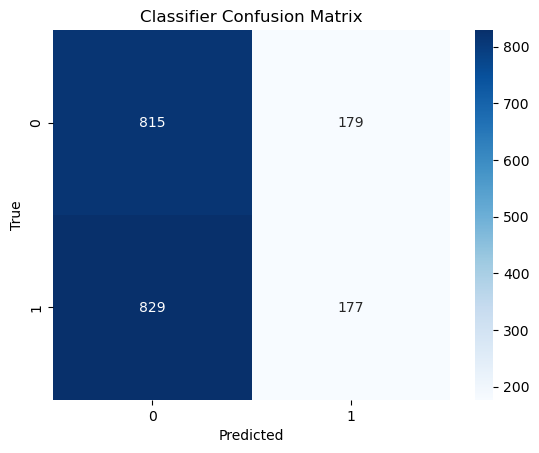

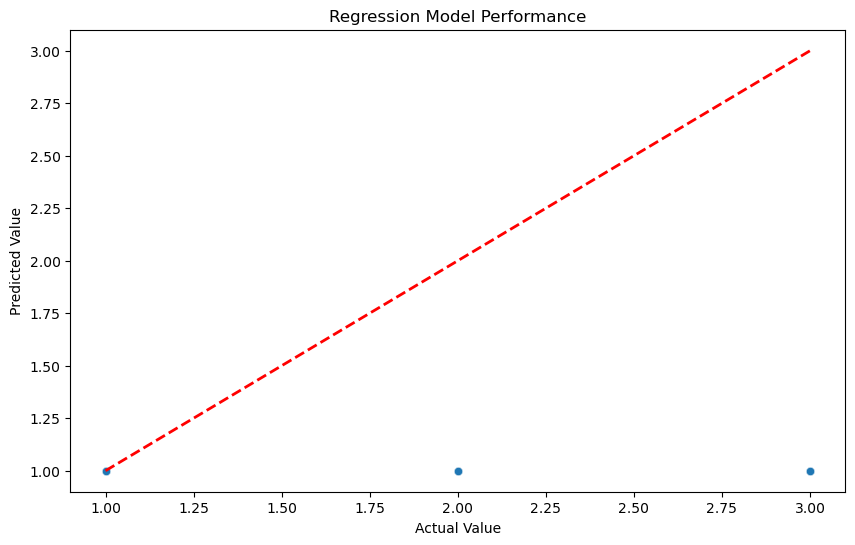

In [6]:
# Plotting Confusion Matrix for the Classifier
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

# Plotting Regression Predictions vs. Actual Values
def plot_regression_results(y_true, y_pred, title='Regression Performance'):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_true, y=y_pred, alpha=0.6)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)  # Diagonal line for reference
    plt.xlabel('Actual Value')
    plt.ylabel('Predicted Value')
    plt.title(title)
    plt.show()

# Convert y_test to binary for confusion matrix plot
y_test_binary = (y_test > 0).astype(int)

# Plotting the diagnostic plots
plot_confusion_matrix(y_test_binary, y_pred_class, title='Classifier Confusion Matrix')
plot_regression_results(y_test[(y_test > 0) & (y_pred_regress > 0)], y_pred_regress[(y_test > 0) & (y_pred_regress > 0)], title='Regression Model Performance')

Classifier Accuracy: 0.78
Regression MSE on non-zero targets: 615.8695519773883


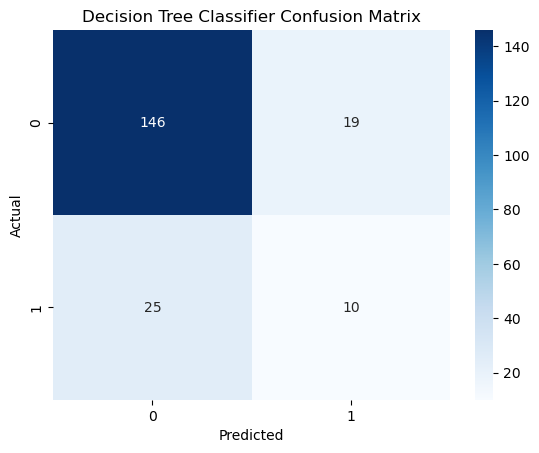

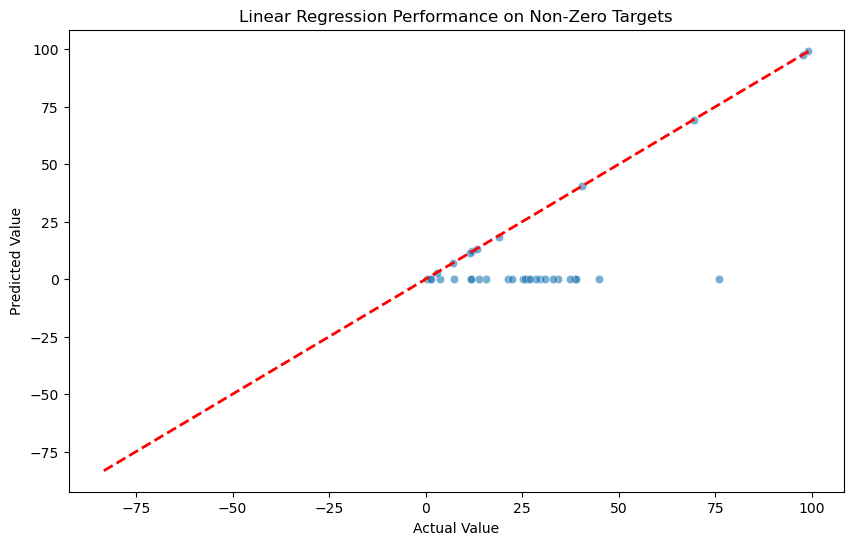

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score

# Generate synthetic data
np.random.seed(42)
X, y = make_regression(n_samples=1000, n_features=2, noise=0.2)
y = np.where(np.random.rand(1000) < 0.7, 0, y)  # Introduce zero-inflation

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Prepare the target for classification
y_train_binary = (y_train > 0).astype(int)
y_test_binary = (y_test > 0).astype(int)

# Train the Decision Tree Classifier
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train_binary)

# Predict on the test set
y_pred_class = classifier.predict(X_test)

# Train Linear Regression on non-zero targets
X_train_non_zero = X_train[y_train > 0]
y_train_non_zero = y_train[y_train > 0]
regressor = LinearRegression()
regressor.fit(X_train_non_zero, y_train_non_zero)

# Predict with Linear Regression where classifier predicts non-zero
X_test_non_zero = X_test[y_pred_class > 0]
y_pred_regress = np.zeros(y_test.shape)
y_pred_regress[y_pred_class > 0] = regressor.predict(X_test_non_zero)

# Evaluate
print("Classifier Accuracy:", accuracy_score(y_test_binary, y_pred_class))
mse = mean_squared_error(y_test[y_test > 0], y_pred_regress[y_test > 0])
print("Regression MSE on non-zero targets:", mse)

# Plotting
sns.heatmap(confusion_matrix(y_test_binary, y_pred_class), annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Classifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test[y_test > 0], y=y_pred_regress[y_test > 0], alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Linear Regression Performance on Non-Zero Targets')
plt.show()
